# Data exploration

## Load one dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [27]:
Patient_1_II = scipy.io.loadmat('../raw_data/Patient_1/Patient_1/Patient_1_preictal_segment_0007.mat')

In [28]:
Patient_1_II

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI64, Created on: Thu Aug 21 01:00:00 2014',
 '__version__': '1.0',
 '__globals__': [],
 'preictal_segment_7': array([[(array([[  52,   52,   52, ...,  112,  112,  113],
        [-205, -207, -208, ...,  153,  152,  151],
        [  66,   65,   65, ..., -273, -273, -274],
        ...,
        [  37,   38,   40, ..., -276, -278, -280],
        [ -23,  -20,  -17, ..., -308, -310, -312],
        [-166, -166, -166, ...,  308,  307,  306]], dtype=int16), array([[600]], dtype=uint16), array([[5000]], dtype=uint16), array([[array(['LD_1'], dtype='<U4'), array(['LD_3'], dtype='<U4'),
         array(['LD_4'], dtype='<U4'), array(['LD_5'], dtype='<U4'),
         array(['LD_6'], dtype='<U4'), array(['LD_7'], dtype='<U4'),
         array(['LD_8'], dtype='<U4'), array(['RD_1'], dtype='<U4'),
         array(['RD_2'], dtype='<U4'), array(['RD_3'], dtype='<U4'),
         array(['RD_4'], dtype='<U4'), array(['RD_5'], dtype='<U4'),
         array(['RD_6']

In [29]:
Patient_1_II['preictal_segment_7'][0][0][0].shape

(15, 3000000)

In [30]:
Patient_1_II_df = pd.DataFrame(Patient_1_II['preictal_segment_7'][0][0][0])
Patient_1_II_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2999990,2999991,2999992,2999993,2999994,2999995,2999996,2999997,2999998,2999999
0,52,52,52,54,55,55,54,53,53,54,...,117,115,115,115,115,114,112,112,112,113
1,-205,-207,-208,-209,-210,-212,-214,-216,-219,-220,...,163,161,159,157,156,155,154,153,152,151
2,66,65,65,66,67,67,65,64,64,64,...,-266,-267,-268,-268,-268,-269,-271,-273,-273,-274
3,54,55,56,57,57,57,57,56,56,57,...,262,261,260,260,260,260,260,259,258,257
4,174,174,175,178,180,181,180,179,179,181,...,53,53,52,52,51,50,48,47,46,45


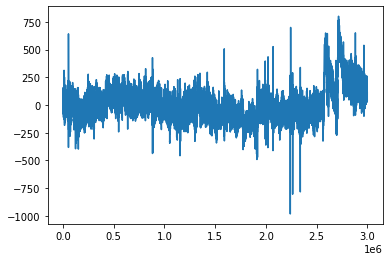

In [31]:
plt.plot(Patient_1_II_df.loc[0])

## Downsample one signal

In [32]:
from scipy.signal import decimate

In [33]:
Patient_1_II_dec = decimate(Patient_1_II['preictal_segment_7'][0][0][0], 10)

In [34]:
Patient_1_II_dec.shape

(15, 300000)

In [35]:
Patient_1_II_dec_dec = decimate(Patient_1_II_dec, 10)

In [36]:
Patient_1_II_dec_dec.shape

(15, 30000)

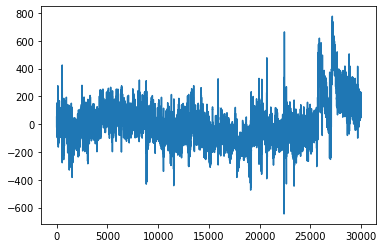

In [37]:
plt.plot(Patient_1_II_dec_dec[0])

## Automate downsampling

For both human datasets, extract and downsample EEG signals for each .mat file. Export downsampled signals as CSV files in new folder.

In [49]:
import os
folder_path = '/Users/commander/code/jhupiterz/timeseries_data/human_seizure_prediction'
!pwd

/Users/commander/code/jhupiterz/timeseries_data/human_seizure_prediction


In [50]:
dirs = ['Patient_1', 'Patient_2']
files_1 = []
files_2 = []

for f in os.listdir(os.path.join(folder_path,dirs[0],dirs[0])):
    files_1.append(f)
    
for f in os.listdir(os.path.join(folder_path,dirs[1],dirs[1])):
    files_2.append(f)

In [52]:
for f in files_1:
    data = scipy.io.loadmat(f'Patient_1/Patient_1/{f}')
    segment_name = list(data.keys())[-1]
    array = decimate(decimate(data[segment_name][0][0][0],10),10) 
    dataframe = pd.DataFrame(array)
    dataframe.to_csv(f'Patient_1_csv/{segment_name}.csv', index = False)

In [54]:
for f in files_2:
    data = scipy.io.loadmat(f'Patient_2/Patient_2/{f}')
    segment_name = list(data.keys())[-1]
    array = decimate(decimate(data[segment_name][0][0][0],10),10) 
    dataframe = pd.DataFrame(array)
    #dataframe.drop('Unnamed: 0', axis = 1, inplace = True)
    dataframe.to_csv(f'Patient_2_csv/{segment_name}.csv', index = False)

## Automate for all folders (including dogs)

In [1]:
import pandas as pd
import numpy as np
import os
import scipy.io
from scipy.signal import decimate

FOLDER_PATH = os.path.join(os.getcwd(),'..','raw_data')

In [34]:
def get_data():
    '''Function that extracts the data from each .mat file, 
    downsample it by a factor of 100 and export it as a .csv file'''
    
    # Creates a dictionary containing all file names (key=name_of_directory, value=list_of_files in directory)
    dirs = ['Dog_1', 'Dog_2', 'Dog_3', 'Dog_4', 'Dog_5']
    file_dict = {}
    for directory in dirs:
        files = []
        for f in os.listdir(os.path.join(FOLDER_PATH,directory,directory)):
            files.append(f)
        file_dict[directory] = files  
    print(file_dict)
    # Reads each .mat file in all directories, downsample, and export as .csv file
    for key in file_dict.keys():  
        for f in file_dict[key]:
            data = scipy.io.loadmat(os.path.join(FOLDER_PATH,key,key,f))
            segment_name = list(data.keys())[-1]
            array = decimate(decimate(data[segment_name][0][0][0],10),10) 
            dataframe = pd.DataFrame(array)
            dataframe.to_csv(f'{FOLDER_PATH}/{key}_csv/{segment_name}.csv', index = False)

In [ ]:
get_data()

{'Dog_1': ['Dog_1_interictal_segment_0085.mat', 'Dog_1_interictal_segment_0091.mat', 'Dog_1_test_segment_0212.mat', 'Dog_1_interictal_segment_0046.mat', 'Dog_1_interictal_segment_0052.mat', 'Dog_1_test_segment_0206.mat', 'Dog_1_interictal_segment_0287.mat', 'Dog_1_interictal_segment_0293.mat', 'Dog_1_interictal_segment_0278.mat', 'Dog_1_test_segment_0038.mat', 'Dog_1_interictal_segment_0244.mat', 'Dog_1_test_segment_0010.mat', 'Dog_1_test_segment_0004.mat', 'Dog_1_interictal_segment_0250.mat', 'Dog_1_preictal_segment_0023.mat', 'Dog_1_test_segment_0158.mat', 'Dog_1_interictal_segment_0318.mat', 'Dog_1_interictal_segment_0330.mat', 'Dog_1_interictal_segment_0456.mat', 'Dog_1_test_segment_0164.mat', 'Dog_1_test_segment_0170.mat', 'Dog_1_interictal_segment_0442.mat', 'Dog_1_interictal_segment_0324.mat', 'Dog_1_test_segment_0399.mat', 'Dog_1_test_segment_0428.mat', 'Dog_1_test_segment_0366.mat', 'Dog_1_interictal_segment_0132.mat', 'Dog_1_test_segment_0400.mat', 'Dog_1_test_segment_0414.ma